<img src ='https://eit.services/wp-content/uploads/2022/08/review-vol-rec-1024x635.png'>

# 🧠  Clustering Algorithms Explored:

- Clustering algorithms are unsupervised machine learning algorithms so there is no label associated with data points. 
- This technique  involves grouping similar data points together into clusters based on certain characteristics. 
- The goal of clustering is to discover inherent patterns or structures in the data without any predefined labels.

# Objective

The objective of this project is to perform cluster analysis on the provided dataset's features, which encompass a wide range of venue types and their associated metrics. By employing advanced clustering techniques, our aim is to uncover distinct groups or clusters within the dataset, where venues with similar characteristics are grouped together. This clustering will facilitate a deeper understanding of patterns, preferences, and trends in venue popularity and satisfaction, enabling more targeted strategies and insights-driven decision-making in various domains such as tourism, urban planning, and customer experience optimization.

# Dataset
The dataset for the project includes various features that capture information about different types of venues or attractions. Each feature represents a specific category of venue and is associated with a numerical value that likely reflects a measure of relevance, popularity, or satisfaction. Here's a description of all the features in the dataset:

    - Churches       : Numeric value representing the popularity of churches in the area.
    - Resorts        : Numeric value indicating the relevance or popularity of resorts.
    - Beaches        : Numeric measure of the importance or attractiveness of beaches.
    - Parks          : Numeric value reflecting the prominence or appeal of parks.
    - Theatres       : Numeric measure of the relevance or popularity of theaters.
    - Museums        : Numeric value indicating the significance or attraction of museums.
    - Malls          : Numeric measure of the importance or popularity of shopping malls.
    - Zoo            : Numeric value representing the relevance or appeal of zoos.
    - Restaurants    : Numeric measure of the significance or popularity of restaurants.
    - Bars           : Numeric value indicating the relevance or popularity of bars.
    - Local Services : Numeric measure of the importance or appeal of local services.
    - Fast Food      : Numeric value reflecting the attraction of fast food establishments.
    - Lodgings       : Numeric measure of the relevance or popularity of lodging options.
    - Juice Bars     : Numeric value indicating the significance or popularity of juice bars.
    - Art Galleries  : Numeric measure of the importance or appeal of art galleries.
    - Dance Clubs    : Numeric value reflecting the prominence or attraction of dance clubs.
    - Swimming Pools : Numeric measure of the relevance or popularity of swimming pools.
    - Gyms           : Numeric value indicating the significance or popularity of fitness gyms.
    - Bakeries       : Numeric measure of the importance or appeal of bakeries.
    - Spas           : Numeric value reflecting the prominence or attraction of spa facilities.
    - Cafes          : Numeric measure of the relevance or popularity of cafes.
    - View Points    : Numeric value indicating the significance or appeal of scenic viewpoints.
    - Monuments      : Numeric measure of the importance or attraction of monuments.
    - Gardens        : Numeric value reflecting the prominence or popularity of gardens.

Each feature's associated numeric value provides insights into the relative importance, popularity, or satisfaction level of that particular type of venue. This dataset's features and values enable the exploration of patterns and clustering to uncover hidden insights and trends related to these venues.

# Model Employed:

The project employed two primary clustering models: K-means Clustering and Hierarchical Clustering.

####  K-means Clustering: 
K-means is a partitioning-based clustering algorithm that divides data points into a pre-defined number of clusters. It aims to minimize the variance within clusters by iteratively adjusting cluster centroids. The algorithm assigns data points to the nearest cluster centroid based on distance metrics. The optimal number of clusters (K) is determined using techniques such as the elbow method, which helps find the point where additional clusters yield diminishing returns in terms of variance reduction.

#### Hierarchical Clustering:
Hierarchical clustering creates a tree-like structure of clusters, known as a dendrogram. It's an agglomerative process, where each data point starts as an individual cluster and is iteratively merged into larger clusters based on proximity. The linkage method defines how the distance between clusters is calculated. Hierarchical clustering doesn't require pre-defining the number of clusters and can help visualize different levels of granularity in clustering results.

Both clustering models offer distinct advantages. K-means is computationally efficient and well-suited for a large number of data points, while hierarchical clustering provides a hierarchical representation that can aid in understanding relationships between clusters. Employing both models enhances the project's ability to explore different perspectives of the data and identify meaningful clusters.


# Evaluation of Model

The clustering results were evaluated using the silhouette score, a metric that measures the separation and cohesion of clusters. A higher silhouette score indicates well-defined and distinct clusters, providing a quantitative measure of the effectiveness of the clustering algorithms.





# ▨ Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# ▨ Loading Dataset

In [2]:
dataset = 'ReviewRatings.csv'
df = pd.read_csv(dataset)
df.head()

,User,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [3]:
df.drop('User', axis=1, inplace=True)

# ▨ Data Cleaning

In [4]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

The total duplicate row before removing duplicate: 3
The total duplicate row after removing duplicate: 0  
shape of dataset after removing duplicate columns : (5453, 24)


# ▨ Exploring Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5453 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Churches        5453 non-null   float64
 1   Resorts         5453 non-null   float64
 2   Beaches         5453 non-null   float64
 3   Parks           5453 non-null   float64
 4   Theatres        5453 non-null   float64
 5   Museums         5453 non-null   float64
 6   Malls           5453 non-null   float64
 7   Zoo             5453 non-null   float64
 8   Restaurants     5453 non-null   float64
 9   Bars            5453 non-null   float64
 10  Local Services  5453 non-null   float64
 11  Fast Food       5453 non-null   float64
 12  Lodgings        5453 non-null   float64
 13  Juice Bars      5453 non-null   float64
 14  Art Galleries   5453 non-null   float64
 15  Dance Clubs     5453 non-null   float64
 16  Swimming Pools  5453 non-null   float64
 17  Gyms            5453 non-null   float6

##### - There are no missing values present in the dataset.



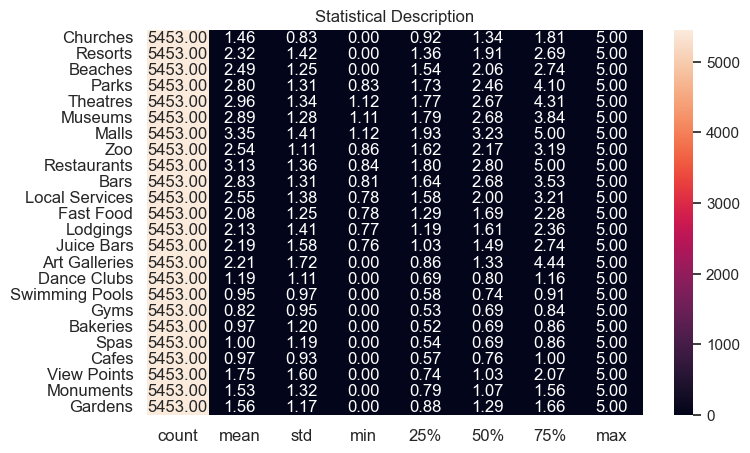

In [6]:
desc=df.describe().T
def descriptive_stats(df):


    plt.figure(figsize=(8,5))
    sns.heatmap(df, annot=True, cmap='rocket', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()


descriptive_stats(desc)

# ▨ Exploratory Data Analysis (EDA)

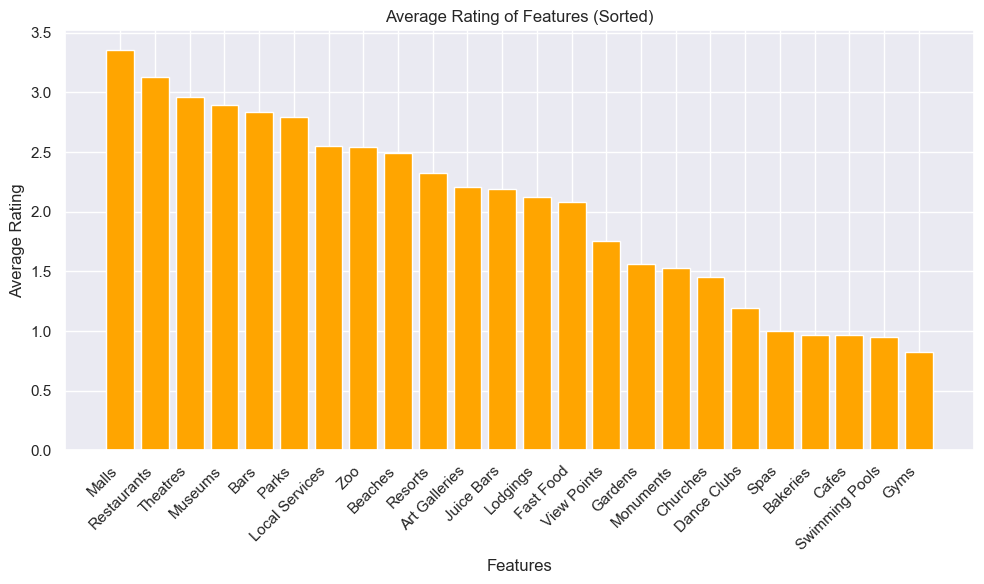

In [7]:
desc_sorted = desc.sort_values(by='mean', ascending=False)

# Plot the average rating for all features
plt.figure(figsize=(10, 6))

plt.bar(desc_sorted.index, desc_sorted['mean'], color='orange')
plt.xlabel('Features')
plt.ylabel('Average Rating')
plt.title('Average Rating of Features (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### "Malls boast the highest average rating, indicating strong popularity among visitors, whereas Gyms receive a comparatively lower average rating."

                     Total no. of Unique Values
Gyms              167
Swimming Pools    190
Bakeries          218
Dance Clubs       221
Cafes             230
Spas              255
Juice Bars        260
Lodgings          273
Churches          281
Malls             284
Fast Food         285
Parks             293
Local Services    295
Gardens           296
Art Galleries     298
Monuments         308
Museums           310
Theatres          316
Beaches           328
Bars              332
Zoo               334
Resorts           340
View Points       343
Restaurants       353
dtype: int64


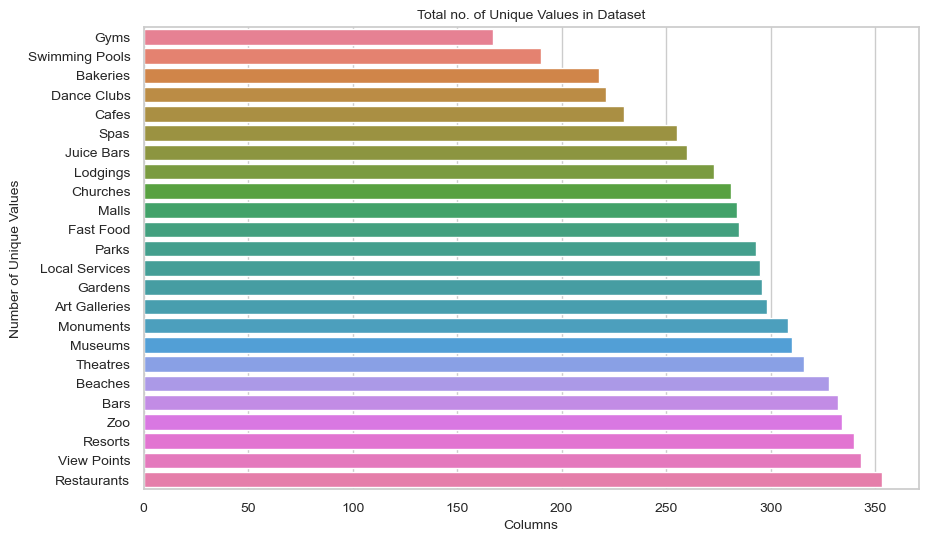

In [8]:
# Count the number of unique values in each column
def check_unquie_count(df):
    unique_counts = df.nunique().sort_values()
    print('=='*30)
    print('  '*10, 'Total no. of Unique Values')
    print('=='*30)
    print(unique_counts)
    print('=='*30)
# Create a bar plot or count plot of unique values
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(y=unique_counts.index, x=unique_counts.sort_values(),palette='husl' )

    plt.xticks(rotation=0, fontsize= 10)
    plt.yticks( fontsize= 10 )
    plt.xlabel('Columns',fontsize=10)
    plt.ylabel('Number of Unique Values', fontsize=10)
    plt.title('Total no. of Unique Values in Dataset', fontsize=10)

# Display the plot
    plt.show()

check_unquie_count(df)

### "Restaurants earnered the highest number of reviews, signifying their widespread appeal, while Gyms received the fewest reviews in comparison."


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
sns.set_style("whitegrid")
# for col in df.columns:
#     plt.boxplot(df[col])
#     plt.ylabel(col)
#     plt.title('Boxplot')
#     plt.show()
# fig, axes = plt.subplots(6, 4, figsize=(20, 30), sharey = True)
# axes = axes.flatten()
plt.figure (figsize =(20,30))
for i, col in enumerate(df.columns):
    plt.subplot(6,4,i+1)
    plt.boxplot(df[col])
    plt.boxplot(df[col])

plt.tight_layout()  
plt.show()

In [ ]:
#Univariate
fig, axes = plt.subplots(6, 4, figsize=(20, 30), sharey = True)
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.distplot(df[col], color="lightcoral", ax=axes[i])
    axes[i].set_title(col)  

plt.tight_layout()  
plt.show()

# ▨ Finding Correlation

In [ ]:
plt.figure( figsize=(30, 30))
sns.heatmap(df.select_dtypes(include ='number').corr(), annot=True,linewidth=.8, cmap="rocket")

# ▨ Importing libraries for Model Building and Evaluation

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


#  ▨ For Scaling the features

In [ ]:
sc = StandardScaler()
sc_df = sc.fit_transform(df.loc[:,:]) #['Resorts','Lodgings']])

## Function for evaluating optimal value of k for clustering and  and clustering modelings:

In [ ]:
# Elbow method : To find optimum number of clusters required for modeling
def optimal_k(sc_df):
    error = []  
    k = list(range(1, 10))

    for i in k:
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(sc_df)
        error.append(kmeans.inertia_)
        #print(f'For n_clusters = {i}, the intertia is {kmeans.inertia_}' )
    plt.figure(figsize =(14,6))
    plt.subplot(1,2,1)
    plt.plot(k, error,  color= 'blue', marker='^')
    plt.xlabel("No_of_Clusters")
    plt.ylabel("wcss")
    plt.title('Elbow Method for kMeans Clustering')
    plt.subplot(1,2,2)
    linkage_matrix = linkage(sc_df, method ='ward')
    dendro = dendrogram(linkage_matrix)
    plt.title('Dendogram Method for hierarcheal clustering')
    plt.tight_layout()
    plt.show()
    
    
    
    
def clustering_model(k_clusters = 3, hc_clusters=3,  scaled= sc_df, xlabel = 'xlabel', ylabel='ylabel'):
    
    km = KMeans(n_clusters = k_clusters,init='k-means++', random_state =123)
    hc = AgglomerativeClustering(n_clusters = hc_clusters,  linkage='ward')
    model_cluster =[('kMeans '+str(k_clusters),km, k_clusters), ('Hierarcheal '+str(hc_clusters),hc, hc_clusters) ]
    for model_name, model, ncluster in model_cluster:
        model.fit(scaled)
        model_labels =  model.labels_
        silhouette = silhouette_score(scaled, model_labels, random_state=1)
#         df_copy= df.copy()
#         df_copy['cluster'] = pd.Series(model_labels)
   
        print('--'*20)
        print(model_name)
        print('--'*20)
        print(f' silhouette score : {silhouette}')
#         print()
#         print( df_copy.iloc[:, :].groupby(df_copy.cluster).mean())
#         print('--'*40)
        color =[ 'cyan', 'skyblue','pink', 'orange','yellow', 'lightgreen', 'lightcoral','orange','purple']
        for i in range(0, ncluster):
            plt.scatter(scaled[model_labels == i, 0], scaled[model_labels == i, 1 ], 
                    s=100, c=color[i], label ='Cluster '+str(i+1))
     
        plt.title(model_name +' Clusters')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend( bbox_to_anchor=(1.2,0.5))
    
        plt.show()

# Case- I  : Clustering with venues `Resorts` and `Lodgings`

In [ ]:
sc_df1 = sc.fit_transform(df.loc[:,['Resorts','Lodgings']])
sc_df1

In [ ]:
optimal_k(sc_df1)

In [ ]:

clustering_model(3, 3,  sc_df1, xlabel ='Resort', ylabel = 'Lodging')


# Case-II : Clustering with food and drinks attarction `Restaurants`, `Bars`,`Fast Food`,`Juice Bars`,`Bakeries`,`Cafes`

In [ ]:
sc_df2 = sc.fit_transform(df.loc[:,['Restaurants', 'Bars','Fast Food','Juice Bars','Bakeries','Cafes']])


In [ ]:
optimal_k(sc_df2)

In [ ]:
clustering_model(7, 7, sc_df2,'Restaurants', 'Bars' )

# Case-III : Clustering with outdoor attractions `Beaches`, `Parks`,`Gardens`

In [ ]:
sc_df3 = sc.fit_transform(df.loc[:,['Beaches', 'Parks','Gardens']])

In [ ]:
optimal_k(sc_df3)

In [ ]:
clustering_model(3, 3, sc_df3, 'Beaches', 'Parks')

# Case-IV : Clustering with  indoor attarction -I `Malls`, `Theatres`

In [ ]:
sc_df4 = sc.fit_transform(df.loc[:,['Malls', 'Theatres']])

In [ ]:
optimal_k(sc_df4)

In [ ]:
clustering_model(3,7,sc_df4,'Malls','Theatres')

# Case-V : Clustering with activities `Dance Clubs`, `Gym` and `Swimming Pools`

In [ ]:
sc_df5 = sc.fit_transform(df.loc[:,['Dance Clubs', 'Gyms','Swimming Pools']])

In [ ]:
optimal_k(sc_df5)

In [ ]:
clustering_model(3,5,sc_df5, 'Dance Clubs', 'Gyms',)

# Case-VI : Clustering with indoor attraction-II `Art Galleries`, `Museums`

In [ ]:
sc_df6 = sc.fit_transform(df.loc[:,['Art Galleries', 'Museums',]])


In [ ]:
optimal_k(sc_df6)

In [ ]:
clustering_model(5,7,sc_df6,'Art Galleries', 'Museums')

# Case-III : Clustering with outdoor attractions -II `Monuments`, `View Points`,`Zoo`

In [ ]:
sc_df7 = sc.fit_transform(df.loc[:,['Monuments', 'View Points', 'Zoo']])

In [ ]:
optimal_k(sc_df7)

In [ ]:
clustering_model(5,5,sc_df7, 'Monuments', 'View Points')

# ▨ Conclusion

 Through rigorous experimentation with k-means and hierarchical clustering techniques and thorough evaluation using silhouette scores, we gained valuable insights into how different features contribute to effective clustering of the review rating dataset. This work sets the foundation for deeper explorations into customer's rating on different types of venues or attractions. decision-making based on the identified clusters.



### ⇒  Utilizing K-means and Hierarchical clustering across all selected categories achieved a positive silhouette scores, affirming the presence of well-defined and distinguishable clusters. 
### ⇒ This outcome, with silhouette scores closer to +1, serves as a robust quantitative indicator of the efficacy of the employed clustering algorithms.

##### Payal Mohanty, 16th August 2023